In [40]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from mplsoccer import Pitch, VerticalPitch, FontManager, add_image
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.patches import Wedge
import matplotlib.patheffects as path_effects
from highlight_text import HighlightText, ax_text, fig_text
from PIL import Image
import matplotlib.patches as patches

pd.set_option("display.max_columns", None)

In [41]:
def dual_half_circle(center, radius, angle=0, ax=None, colors=('w','k'),
                     **kwargs):
    """
    Add two half circles to the axes *ax* (or the current axes) with the 
    specified facecolors *colors* rotated at *angle* (in degrees).
    """
    if ax is None:
        ax = plt.gca()
    theta1, theta2 = angle, angle + 180
    w1 = Wedge(center, radius, theta1, theta2, fc=colors[0], **kwargs)
    w2 = Wedge(center, radius, theta2, theta1, fc=colors[1], **kwargs)
    for wedge in [w1, w2]:
        ax.add_artist(wedge)
    return [w1, w2]

In [202]:
def adjustFigAspect(fig,aspect=1):
    '''
    Adjust the subplot parameters so that the figure has the correct
    aspect ratio.
    '''
    xsize,ysize = fig.get_size_inches()
    minsize = min(xsize,ysize)
    xlim = .4*minsize/xsize
    ylim = .4*minsize/ysize
    if aspect < 1:
        xlim *= aspect
    else:
        ylim /= aspect
    fig.subplots_adjust(left=.5-xlim,
                        right=.5+xlim,
                        bottom=.5-ylim,
                        top=.5+ylim)

In [135]:
# fetch the data
pass_df = pd.read_csv("../data/pass_data.csv")
shot_df = pd.read_csv("../data/shot_data.csv")
all_shots = pd.read_csv("../data/all_shots.csv")
prog_df = pd.read_csv("../data/prog_passes.csv")
pen_df = pd.read_csv("../data/pen_passes.csv")
pen_df2 = pd.read_csv("../data/pen_passes2.csv")
temp_df = pd.read_csv("../data/temp.csv")

In [43]:
font_normal = FontManager((
    "https://github.com/Slothfulwave612/data/blob/master/fonts/Basier%20Circle/BasierCircle-Regular.ttf?raw=true"
))
font_bold = FontManager((
    "https://github.com/Slothfulwave612/data/blob/master/fonts/Basier%20Circle/BasierCircle-Bold.ttf?raw=true"
))
font_medium = FontManager((
    "https://github.com/Slothfulwave612/data/blob/master/fonts/Basier%20Circle/BasierCircle-Medium.ttf?raw=true"
))
font_italic = FontManager("https://github.com/Slothfulwave612/data/blob/master/fonts/Basier%20Circle/BasierCircle-Italic.ttf?raw=true")

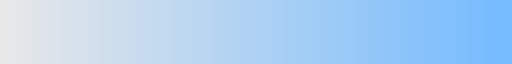

In [4]:
cmap = LinearSegmentedColormap.from_list(
    "barca_cmap", ["#E8E8E8", "#74BBFF"], N=100
)

cmap

In [5]:
temp_df = pass_df[["endX", "endY"]].copy()
temp_df["shot_x"] = shot_df['x']
temp_df["shot_y"] = shot_df['y']

In [6]:
temp_df["to_pick"] = np.sqrt((pass_df["endX"] - shot_df['x']) ** 2 + (pass_df["endY"] - shot_df['y']) ** 2) >= 5

In [7]:
temp_df.loc[temp_df["to_pick"] == True]

,endX,endY,shot_x,shot_y,to_pick
3,77.4,68.0,77.6,62.3,True
4,74.5,29.8,75.6,45.0,True
16,68.3,81.1,90.3,75.4,True
24,73.9,34.9,75.5,42.9,True
35,74.4,48.7,84.8,52.2,True


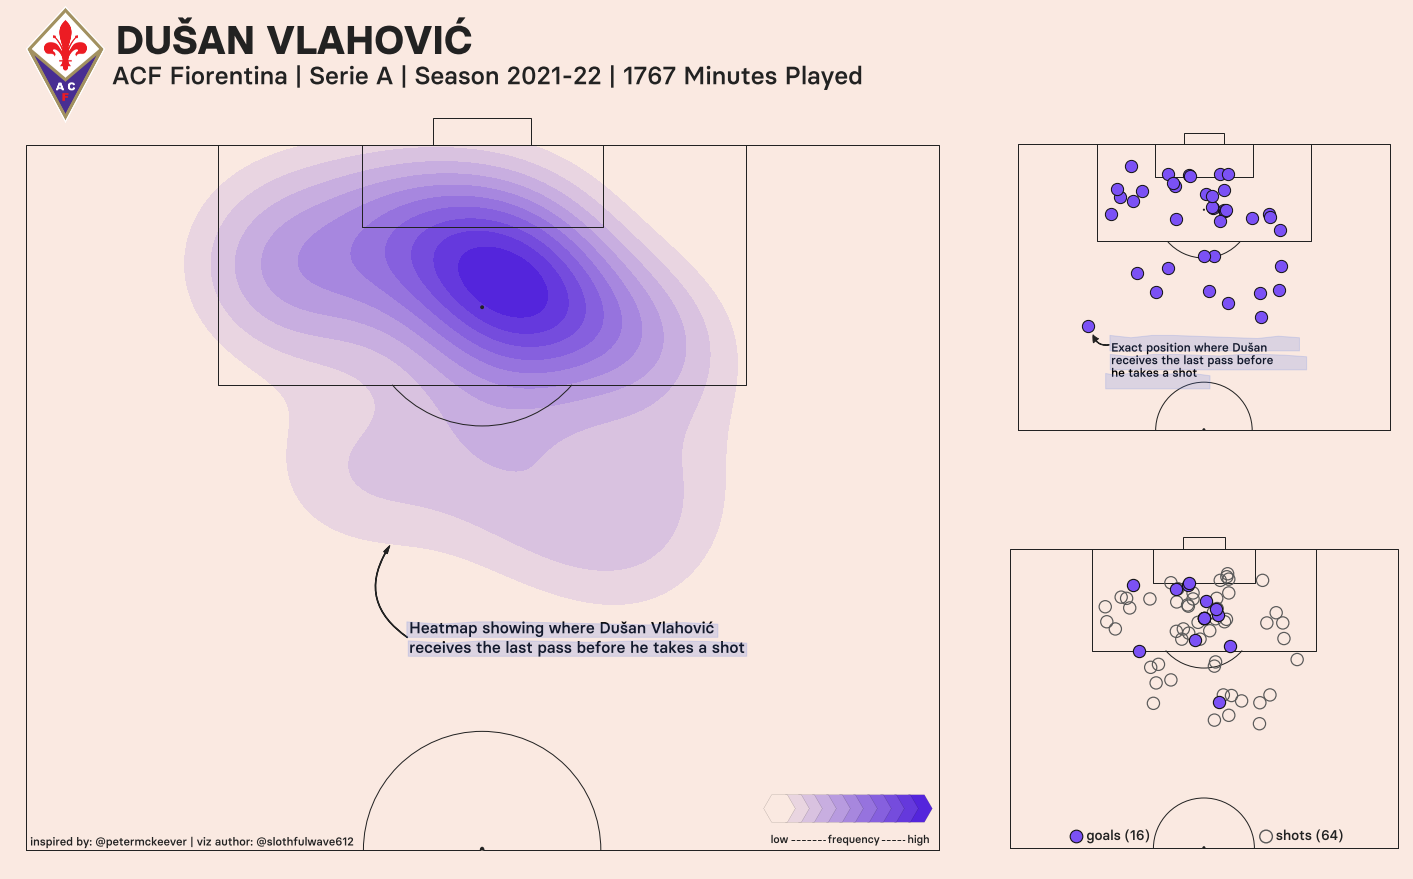

In [395]:
bck_color = "#FAE9E1"
line_color = "#222222"

axes = plt.figure(
    constrained_layout=True, figsize=(20,12), facecolor=bck_color
).subplot_mosaic(
    """
    AAB
    AAC
    """
)

# setup pitch
pitch = VerticalPitch(
    pitch_type="opta", line_zorder=2, goal_type="box", half=True,
    pitch_color=bck_color, line_color=line_color, goal_alpha=1, spot_scale=0.001,
    pad_bottom=1, pad_top=13, pad_left=2, pad_right=2, linewidth=1,
)

pitch2 = VerticalPitch(
    pitch_type="opta", line_zorder=2, goal_type="box", half=True,
    pitch_color=bck_color, line_color=line_color, goal_alpha=1, spot_scale=0.001,
    pad_bottom=1, pad_top=35, pad_left=2, pad_right=2, linewidth=1,
)

pitch3 = VerticalPitch(
    pitch_type="opta", line_zorder=2, goal_type="box", half=True,
    pitch_color=bck_color, line_color=line_color, goal_alpha=1, spot_scale=0.001,
    pad_bottom=6, pad_top=25, pad_left=2, pad_right=2, linewidth=1,
)

pitch.draw(ax=axes['A'])
pitch2.draw(ax=axes['B'])
pitch3.draw(ax=axes['C'])

cmap = LinearSegmentedColormap.from_list(
    "heat_cmap", [bck_color, "#5425DC"], N=11
)

# plot heatmap 
kdeplot = pitch.kdeplot(
    pass_df["endX"], pass_df["endY"], ax=axes['A'], cmap=cmap, shade=True, levels=500
)


dual_half_circle(
    (50, 50), 0.2, ax=axes['A'], colors=(line_color, bck_color),
    zorder=4, ec=line_color, lw=1
)

rect = plt.Rectangle(
    (-2, 49.95), width=110, height=-5, fc=bck_color, zorder=5
)
axes['A'].add_patch(rect)

dual_half_circle(
    (50, 50), 0.3, ax=axes['B'], colors=(line_color, bck_color),
    zorder=4, ec=line_color, lw=1
)

rect = plt.Rectangle(
    (-2, 49.95), width=110, height=-5, fc=bck_color, zorder=5
)
axes['B'].add_patch(rect)

dual_half_circle(
    (50, 50), 0.3, ax=axes['C'], colors=(line_color, bck_color),
    zorder=4, ec=line_color, lw=1
)

rect = plt.Rectangle(
    (-2, 49.9), width=110, height=-5, fc=bck_color, zorder=5
)
axes['C'].add_patch(rect)

pitch2.scatter(
    pass_df["endX"], pass_df["endY"], s=150, ax=axes['B'],
    ec="#121212", zorder=4, fc="#7B51F5", lw=1
)

# no goal
pitch3.scatter(
    all_shots.loc[all_shots["isGoal"] == True]['x'], all_shots.loc[all_shots["isGoal"] == True]['y'], s=150, ax=axes['C'],
    ec="#121212", zorder=5, fc="#7B51F5", lw=1.1
)

# goal
pitch3.scatter(
    all_shots.loc[all_shots["isGoal"] != True]['x'], all_shots.loc[all_shots["isGoal"] != True]['y'], s=150, ax=axes['C'],
    ec="#595959", zorder=4, fc="none", lw=1.2
)


texts = [
    {
        'x': 0.325, 'y': 0.95, 's': "Dušan Vlahović".upper(),
        "color": "#222222", "ha": "right",
        "fontsize": 40, "fontproperties": font_bold.prop,
        "path_effects": [
            path_effects.withStroke(linewidth=2, foreground=bck_color),
        ]
    },
    {
        'x': 0.335, 'y': 0.915, 's': "ACF Fiorentina | Serie A | Season 2021-22 | 1767 Minutes Played",
        "color": "#222222", "ha": "center",
        "fontsize": 25, "fontproperties": font_medium.prop,
        "path_effects": [
            path_effects.withStroke(linewidth=2, foreground=bck_color),
        ]
    },
]

for text_val in texts:
    plt.gcf().text(**text_val)

# color list
color_list = []

for i in range(cmap.N):
    rgba = cmap(i)
    color_list.append(mpl.colors.rgb2hex(rgba))

# scatter points
x = 2.5
for val in color_list[::-1]:
    axes['A'].scatter(
        x, 53, s=1000, marker='H', fc=val, ec="#000000", lw=0.1
    )
    x += 1.5

message = ax_text(
    s="< Heatmap showing where Dušan Vlahović       >\n<receives the last pass before he takes a shot        >",
    x=60, y=65, va='center', vsep=2, zorder=2,
    highlight_textprops=[{"color": "none"}, {"color": "none"}],
    ax=axes['A'], fontsize=16, fontproperties=font_medium.prop
)

message.make_highlight_insets([True, True])
insets = message.highlight_axes
insets[0].fill_between(
    np.arange(0, 1, 0.1),
    [1, 0.85, 1, 1, 0.95, 0.9, 0.85, 0.8, 0.95, 0.85],
    color="#607fe1", alpha = 0.2, zorder=1
)
insets[1].fill_between(
    np.arange(0, 1, 0.1),
    [1, 0.85, 1, 1, 0.95, 0.9, 1, 1, 0.95, 0.85],
    color="#607fe1", alpha = 0.2, zorder=1
)

message = ax_text(
    s="<Exact position where Dušan>\n<receives the last pass before>\n<he takes a shot>",
    x=78, y=62, va='center', vsep=2, zorder=2,
    highlight_textprops=[{"color": "none"}, {"color": "none"}, {"color": "none"}],
    ax=axes['B'], fontsize=16, fontproperties=font_medium.prop
)
message.make_highlight_insets([True, True, True])
insets = message.highlight_axes
insets[0].fill_between(
    np.arange(0, 1, 0.1),
    [1, 0.85, 1, 1, 0.95, 0.9, 0.85, 0.8, 0.95, 0.85],
    color="#607fe1", alpha = 0.2, zorder=1
)
insets[1].fill_between(
    np.arange(0, 1, 0.1),
    [1, 0.85, 1, 1, 0.95, 0.9, 1, 1, 0.95, 0.85],
    color="#607fe1", alpha = 0.2, zorder=1
)
insets[2].fill_between(
    np.arange(0, 1, 0.1),
    [1, 0.85, 1, 1, 0.95, 0.9, 1, 1, 0.95, 0.85],
    color="#607fe1", alpha = 0.2, zorder=1
)

texts = [
    {
        'x': 1, 'y': 50.5, 's': "high",
        "color": "#222222", "ha": "right",
        "fontsize": 11, "fontproperties": font_medium.prop,
        "path_effects": [
            path_effects.withStroke(linewidth=6, foreground=bck_color),
        ]
    },
    {
        'x': 6.5, 'y': 50.5, 's': "frequency",
        "color": "#222222", "ha": "right",
        "fontsize": 11, "fontproperties": font_medium.prop,
        "path_effects": [
            path_effects.withStroke(linewidth=6, foreground=bck_color),
        ]
    },
    {
        'x': 16.5, 'y': 50.5, 's': "low",
        "color": "#222222", "ha": "right",
        "fontsize": 11, "fontproperties": font_medium.prop,
        "path_effects": [
            path_effects.withStroke(linewidth=6, foreground=bck_color),
        ]
    },
    {
        'x': 58, 'y': 65, 's': "Heatmap showing where Dušan Vlahović\nreceives the last pass before he takes a shot",
        "color": "#000000", "va": "center",
        "fontsize": 16, "fontproperties": font_medium.prop,
        "path_effects": [
            path_effects.withStroke(linewidth=2, foreground=bck_color),
        ]
    },
    {
        'x': 99.5, 'y': 50.5, 's': "inspired by: @petermckeever | viz author: @slothfulwave612",
        "color": "#222222", "va": "center", "ha": "left",
        "fontsize": 11.5, "fontproperties": font_medium.prop,
        "path_effects": [
            path_effects.withStroke(linewidth=2, foreground=bck_color),
        ]
    },
]

for text_val in texts:
    axes['A'].text(**text_val)

texts = [
    {
        'x': 75, 'y': 62, 's': "Exact position where Dušan\nreceives the last pass before\nhe takes a shot",
        "color": "#000000", "va": "center",
        "fontsize": 12, "fontproperties": font_medium.prop,
        "path_effects": [
            path_effects.withStroke(linewidth=2, foreground=bck_color),
        ]
    },
]

for text_val in texts:
    axes['B'].text(**text_val)

style = "Simple, tail_width=0.5, head_width=4, head_length=8"
kw = dict(arrowstyle=style, color="#222222")
axes['A'].add_patch(
    patches.FancyArrowPatch(
        (58, 65), (60, 71.7),
        connectionstyle="arc3,rad=-.5", **kw
    )
)

style = "Simple, tail_width=0.5, head_width=4, head_length=8"
kw = dict(arrowstyle=style, color="#222222")
axes['A'].add_patch(
    patches.FancyArrowPatch(
        (58, 65), (60, 71.7),
        connectionstyle="arc3,rad=-.5", **kw
    )
)

style = "Simple, tail_width=0.5, head_width=6.5, head_length=6.5"
kw = dict(arrowstyle=style, color="#222222")
axes['B'].add_patch(
    patches.FancyArrowPatch(
        (75, 65), (80, 67),
        connectionstyle="arc3,rad=-.5", **kw
    )
)

axes['C'].scatter(
    x=83, y=52, s=160,
    ec="#121212", fc="#7B51F5", lw=1.1
)
axes['C'].scatter(
    x=34, y=52, s=160,
    ec="#595959", fc="none", lw=1.4
)

texts = [
    {
        'x': 64, 'y': 52, 's': "goals (16)",
        "color": "#222222", "ha": "right", "va": "center",
        "fontsize": 14, "fontproperties": font_medium.prop,
        "path_effects": [
            path_effects.withStroke(linewidth=2, foreground=bck_color),
        ]
    },
    {
        'x': 31.5, 'y': 52, 's': "shots (64)",
        "color": "#222222", "ha": "left", "va": "center",
        "fontsize": 14, "fontproperties": font_medium.prop,
        "path_effects": [
            path_effects.withStroke(linewidth=2, foreground=bck_color),
        ]
    },
]

for text_val in texts:
    axes['C'].text(**text_val)

_ = add_image(Image.open("../logos/Fiorentina.png"), plt.gcf(), -0.025, 0.87, 0.135, 0.135, zorder=5)

axes['A'].plot(
    (3.6, 18), (50.7, 50.7), color="#222222", lw=1, ls="--", alpha=1
)

plt.gcf().savefig("../plots/heatmap.jpg", dpi=600, bbox_inches="tight")

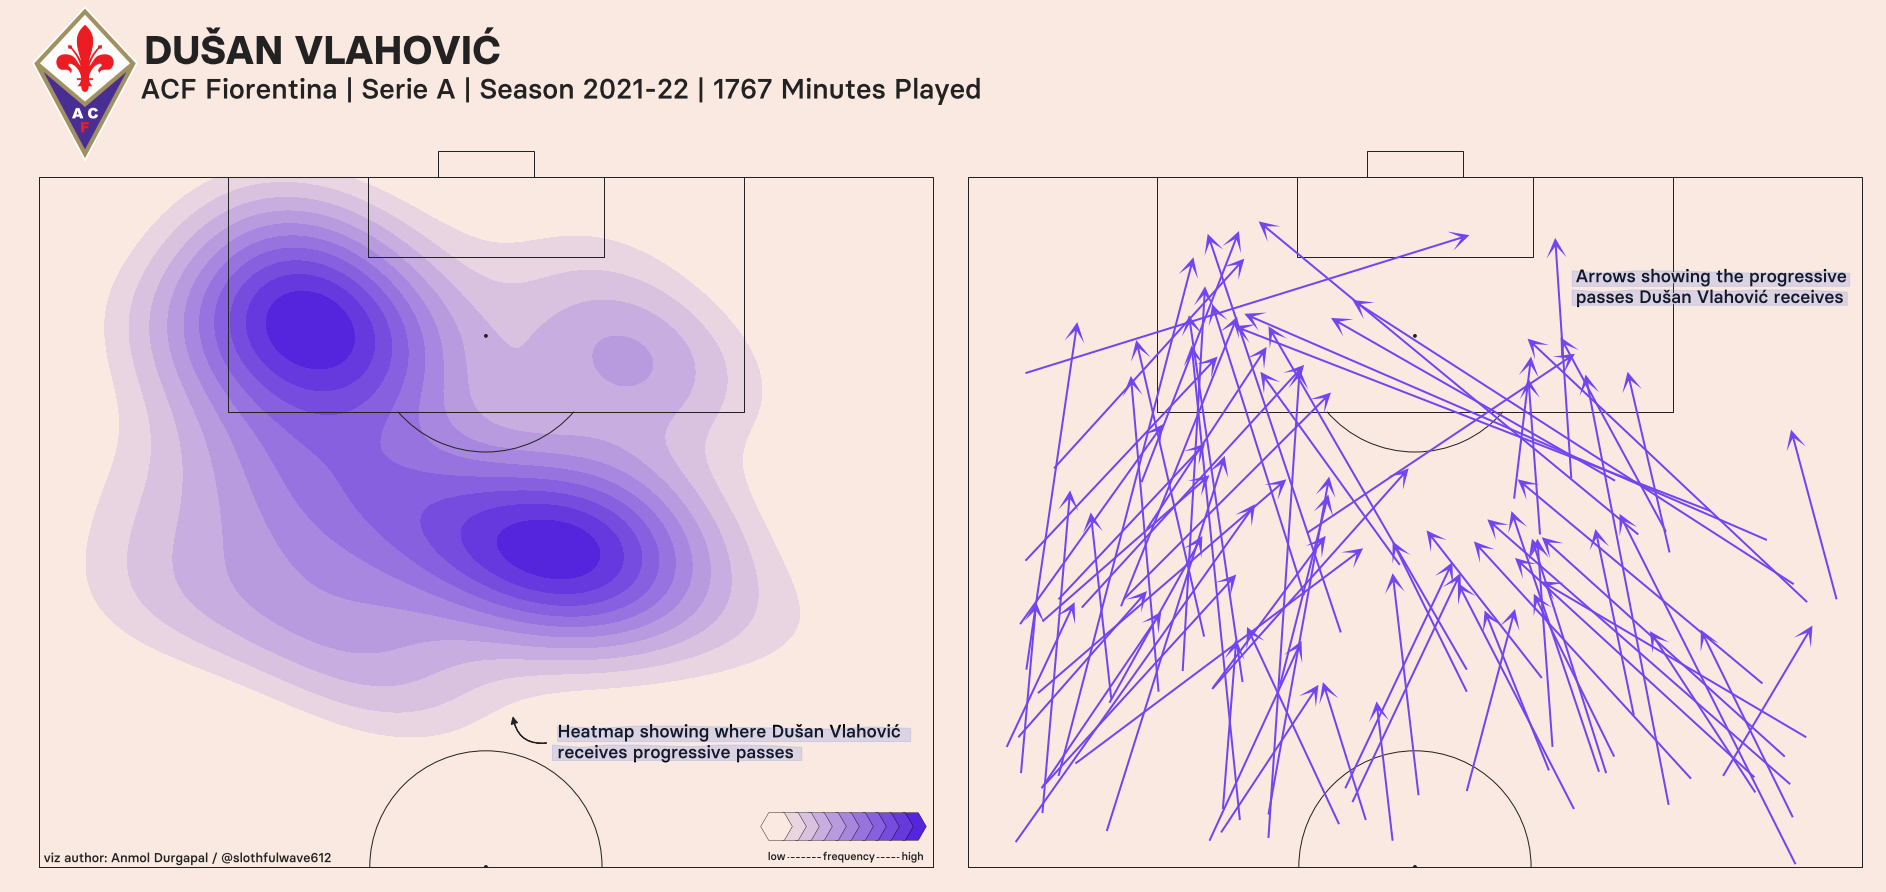

In [205]:
bck_color = "#FAE9E1"
line_color = "#222222"

# setup pitch
pitch = VerticalPitch(
    pitch_type="opta", line_zorder=2, goal_type="box", half=True,
    pitch_color=bck_color, line_color=line_color, goal_alpha=1, spot_scale=0.001,
    pad_bottom=2, pad_top=13, pad_left=2, pad_right=2, linewidth=1,
)

# draw
fig, axes = pitch.grid(
    nrows=1, ncols=2, space=0, figheight=16, title_height=0, endnote_height=0,
)
fig.set_facecolor(bck_color)

adjustFigAspect(fig, 16/9)

for index, ax in enumerate(axes["pitch"]):
    dual_half_circle(
        (50, 49), 1, ax=ax, colors=(line_color, bck_color),
        zorder=4, ec=line_color, lw=1
    )

    rect = plt.Rectangle(
        (-2, 49.95), width=110, height=-5, fc=bck_color, zorder=5
    )
    ax.add_patch(rect)

    # heatmap
    if index == 0:
        cmap = LinearSegmentedColormap.from_list(
            "heat_cmap", [bck_color, "#5425DC"], N=11
        )

        # plot heatmap 
        kdeplot = pitch.kdeplot(
            prog_df["endX"], prog_df["endY"], ax=ax, cmap=cmap, shade=True, levels=500
        )

        # color list
        color_list = []

        for i in range(cmap.N):
            rgba = cmap(i)
            color_list.append(mpl.colors.rgb2hex(rgba))

        # scatter points
        x = 2.5
        for val in color_list[::-1]:
            ax.scatter(
                x, 53, s=1000, marker='H', fc=val, ec="#000000", lw=0.4
            )
            x += 1.5

            texts = [
            {
                'x': 1, 'y': 50.5, 's': "high",
                "color": "#222222", "ha": "right",
                "fontsize": 11, "fontproperties": font_medium.prop,
                "path_effects": [
                    path_effects.withStroke(linewidth=6, foreground=bck_color),
                ]
            },
            {
                'x': 6.5, 'y': 50.5, 's': "frequency",
                "color": "#222222", "ha": "right",
                "fontsize": 11, "fontproperties": font_medium.prop,
                "path_effects": [
                    path_effects.withStroke(linewidth=6, foreground=bck_color),
                ]
            },
            {
                'x': 16.5, 'y': 50.5, 's': "low",
                "color": "#222222", "ha": "right",
                "fontsize": 11, "fontproperties": font_medium.prop,
                "path_effects": [
                    path_effects.withStroke(linewidth=6, foreground=bck_color),
                ]
            },
            {
                'x': 42, 'y': 59, 's': "Heatmap showing where Dušan Vlahović\nreceives progressive passes",
                "color": "#000000", "va": "center",
                "fontsize": 18, "fontproperties": font_medium.prop,
                "path_effects": [
                    path_effects.withStroke(linewidth=2, foreground=bck_color),
                ]
            },
            {
                'x': 99.5, 'y': 50.6, 's': "viz author: Anmol Durgapal / @slothfulwave612",
                "color": "#222222", "va": "center", "ha": "left",
                "fontsize": 13, "fontproperties": font_medium.prop,
                "path_effects": [
                    path_effects.withStroke(linewidth=2, foreground=bck_color),
                ]
            },
        ]

        for text_val in texts:
            ax.text(**text_val)

        message = ax_text(
            s="<     Heatmap showing where Dušan Vlahović             >\n<     receives progressive passes         >",
            x=44, y=59, va='center', vsep=2, zorder=2,
            highlight_textprops=[{"color": "none"}, {"color": "none"}],
            ax=ax, fontsize=16, fontproperties=font_medium.prop
        )

        message.make_highlight_insets([True, True])
        insets = message.highlight_axes
        insets[0].fill_between(
            np.arange(0, 1, 0.1),
            [1, 0.85, 1, 1, 0.95, 0.9, 0.85, 0.8, 0.95, 0.85],
            color="#607fe1", alpha = 0.2, zorder=1
        )
        insets[1].fill_between(
            np.arange(0, 1, 0.1),
            [1, 0.85, 1, 1, 0.95, 0.9, 1, 1, 0.95, 0.85],
            color="#607fe1", alpha = 0.2, zorder=1
        )

        ax.plot(
            (3.6, 18), (50.7, 50.7), color="#222222", lw=1, ls="--", alpha=1
        )

        
        style = "Simple, tail_width=0.5, head_width=6.5, head_length=6.5"
        kw = dict(arrowstyle=style, color="#222222")
        ax.add_patch(
            patches.FancyArrowPatch(
                (43, 59), (47, 61),
                connectionstyle="arc3,rad=-.5", **kw
            )
        )

    elif index == 1:
        # successful passes
        pitch.arrows(
            prog_df['x'], prog_df['y'], prog_df["endX"], prog_df["endY"],
            width=2,  headwidth=10, headlength=10,
            facecolor="#7145F1", edgecolor="#7145F1", ax=ax, zorder=4
        )

        texts = [
            {
                'x': 32, 'y': 92, 's': "Arrows showing the progressive\npasses Dušan Vlahović receives",
                "color": "#000000", "va": "center", "zorder": 4,
                "fontsize": 18, "fontproperties": font_medium.prop,
                "path_effects": [
                    path_effects.withStroke(linewidth=2, foreground=bck_color),
                ]
            },
        ]

        for text_val in texts:
            ax.text(**text_val)

        message = ax_text(
            s="<  Arrows showing the progressive            >\n<  passes Dušan Vlahović receives            >",
            x=34, y=92, va='center', vsep=2, zorder=2,
            highlight_textprops=[{"color": "none"}, {"color": "none"}],
            ax=ax, fontsize=16, fontproperties=font_medium.prop
        )

        message.make_highlight_insets([True, True])
        insets = message.highlight_axes
        insets[0].fill_between(
            np.arange(0, 1, 0.1),
            [1, 0.85, 1, 1, 0.95, 0.9, 0.85, 0.8, 0.95, 0.85],
            color="#607fe1", alpha = 0.2, zorder=1
        )
        insets[1].fill_between(
            np.arange(0, 1, 0.1),
            [1, 0.85, 1, 1, 0.95, 0.9, 1, 1, 0.95, 0.85],
            color="#607fe1", alpha = 0.2, zorder=1
        )

texts = [
    {
        'x': 0.27, 'y': 0.855, 's': "Dušan Vlahović".upper(),
        "color": "#222222", "ha": "right",
        "fontsize": 40, "fontproperties": font_bold.prop,
        "path_effects": [
            path_effects.withStroke(linewidth=2, foreground=bck_color),
        ]
    },
    {
        'x': 0.301, 'y': 0.825, 's': "ACF Fiorentina | Serie A | Season 2021-22 | 1767 Minutes Played",
        "color": "#222222", "ha": "center",
        "fontsize": 28, "fontproperties": font_medium.prop,
        "path_effects": [
            path_effects.withStroke(linewidth=2, foreground=bck_color),
        ]
    },
]

for text_val in texts:
    fig.text(**text_val)

_ = add_image(Image.open("../logos/Fiorentina.png"), fig, -0.01, 0.77, 0.135, 0.135, zorder=5)

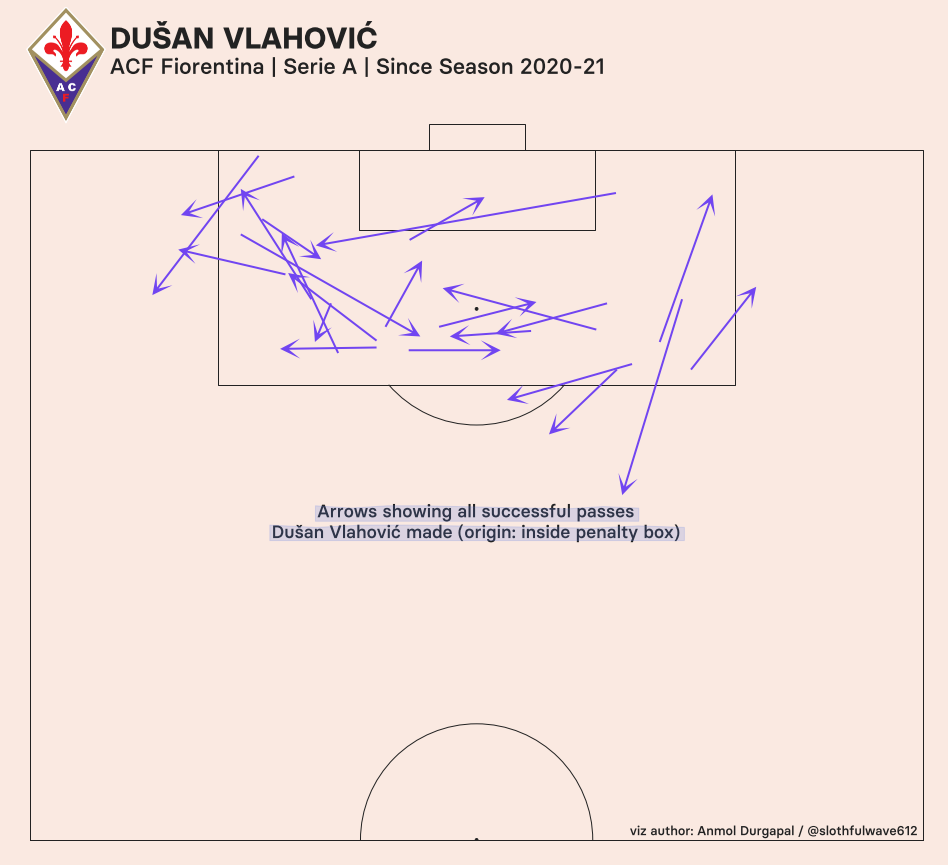

In [204]:
bck_color = "#FAE9E1"
line_color = "#222222"

# setup pitch
pitch = VerticalPitch(
    pitch_type="opta", line_zorder=2, goal_type="box", half=True,
    pitch_color=bck_color, line_color=line_color, goal_alpha=1, spot_scale=0.001,
    pad_bottom=2, pad_top=13, pad_left=2, pad_right=2, linewidth=1,
)

# draw
fig, axes = pitch.grid(
    nrows=1, ncols=1, space=0, figheight=16, title_height=0, endnote_height=0,
)
fig.set_facecolor(bck_color)

# set aspect ratio
adjustFigAspect(fig, 16/9)

# successful passes
pitch.arrows(
    pen_df['x'], pen_df['y'], pen_df["endX"], pen_df["endY"],
    width=2, headwidth=10, headlength=10,
    facecolor="#7145F1", edgecolor="#7145F1", ax=axes["pitch"], zorder=4
)

# successful passes
pitch.arrows(
    pen_df2['x'], pen_df2['y'], pen_df2["endX"], pen_df2["endY"],
    width=2, headwidth=10, headlength=10,
    facecolor="#7145F1", edgecolor="#7145F1", ax=axes["pitch"], zorder=4
)

texts = [
    {
        'x': 50, 'y': 73, 's': "Arrows showing all successful passes\nDušan Vlahović made (origin: inside penalty box)",
        "color": "#222222", "va": "center", "ha": "center",
        "fontsize": 18, "fontproperties": font_medium.prop,
        "path_effects": [
            path_effects.withStroke(linewidth=2, foreground=bck_color),
        ]
    },
    {
        'x': 0.5, 'y': 50.6, 's': "viz author: Anmol Durgapal / @slothfulwave612",
        "color": "#222222", "va": "center", "ha": "right",
        "fontsize": 13, "fontproperties": font_medium.prop,
        "path_effects": [
            path_effects.withStroke(linewidth=2, foreground=bck_color),
        ]
    },
]

for text_val in texts:
    axes["pitch"].text(**text_val)

message = ax_text(
    s="<        Arrows showing all successful passes        >",
    x=50, y=73.7, ha='center', vsep=2, zorder=2, va="center",
    highlight_textprops=[{"color": "none"}],
    ax=axes["pitch"], fontsize=16, fontproperties=font_medium.prop
)
message.make_highlight_insets([True])
insets = message.highlight_axes
insets[0].fill_between(
    np.arange(0, 1, 0.1),
    [1, 0.85, 1, 1, 0.95, 0.9, 0.85, 0.8, 0.95, 0.85],
    color="#607fe1", alpha = 0.2, zorder=1
)

message = ax_text(
    s="<          Dušan Vlahović made (origin: inside penalty box)          >",
    x=50, y=72.3, ha='center', vsep=2, zorder=2, va="center",
    highlight_textprops=[{"color": "none"}],
    ax=axes["pitch"], fontsize=16, fontproperties=font_medium.prop
)
message.make_highlight_insets([True])
insets = message.highlight_axes
insets[0].fill_between(
    np.arange(0, 1, 0.1),
    [1, 0.85, 1, 1, 0.95, 0.9, 0.85, 0.8, 0.95, 0.85],
    color="#607fe1", alpha = 0.2, zorder=1
)

rect = plt.Rectangle(
    (-2, 49.95), width=110, height=-5, fc=bck_color, zorder=5
)
axes["pitch"].add_patch(rect)

texts = [
    {
        'x': 0.125, 'y': 0.845, 's': "Dušan Vlahović".upper(),
        "color": "#222222", "ha": "left",
        "fontsize": 30, "fontproperties": font_bold.prop,
        "path_effects": [
            path_effects.withStroke(linewidth=2, foreground=bck_color),
        ]
    },
    {
        'x': 0.125, 'y': 0.823, 's': "ACF Fiorentina | Serie A | Since Season 2020-21",
        "color": "#222222", "ha": "left",
        "fontsize": 22, "fontproperties": font_medium.prop,
        "path_effects": [
            path_effects.withStroke(linewidth=2, foreground=bck_color),
        ]
    },
]

for text_val in texts:
    fig.text(**text_val)

_ = add_image(Image.open("../logos/Fiorentina.png"), fig, 0.02, 0.77, 0.12, 0.12, zorder=5)

In [206]:
fig.savefig("../plots/progressive_passes.jpg", dpi=500, bbox_inches="tight")